**#0 Installing and Importing Data and Functions**

In [1]:
!pip install ucimlrepo
%pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 890.1 kB/s eta 0:00:00


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import lag_plot
from pandas.core.frame import DataFrame
from google.colab import drive
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [3]:
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets
X["income"] = y
df = X

df['income'].replace("<=50K.", "<=50K", inplace = True)
df['income'].replace(">=50K.", ">=50K", inplace = True)
df['income'].replace("<50K.", "<50K", inplace = True)
df['income'].replace(">50K.", ">50K", inplace = True)
y['income'].replace("<=50K.", "<=50K", inplace = True)
y['income'].replace(">=50K.", ">=50K", inplace = True)
y['income'].replace("<50K.", "<50K", inplace = True)
y['income'].replace(">50K.", ">50K", inplace = True)

X["income"] = y

df.head()

<ipython-input-3-cfd7056057f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'].replace("<=50K.", "<=50K", inplace = True)
<ipython-input-3-cfd7056057f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'].replace(">=50K.", ">=50K", inplace = True)
<ipython-input-3-cfd7056057f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'].replace("<50K.", "<50K", inplace = True)
<ipython-input-3-cfd7056057f6>:16

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**#1 Cleaning and Preparing**

In [4]:
df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].apply(pd.to_numeric)

In [5]:
newx = pd.DataFrame(df["occupation"])
newx["income"] = y
newx.head()

new_greaterthan = (
    pd.get_dummies(newx, columns=['occupation', 'income'])
        .groupby('income_>50K', as_index=False)
        .sum())

new_df = (
    pd.get_dummies(newx, columns=['occupation', 'income'])
        .groupby('income_<=50K', as_index=False)
        .sum())

ratio = new_df.values[0]/new_df.values[1]
new_df.loc[len(new_df.index)] = ratio

df["occupation"].replace("?", "Farming-fishing", inplace = True)
df["occupation"].fillna("Farming-fishing", inplace = True)

<ipython-input-5-bb72974d9074>:15: RuntimeWarning: divide by zero encountered in divide
  ratio = new_df.values[0]/new_df.values[1]


In [6]:
df["workclass"].unique()
neww = pd.DataFrame(df["workclass"])
neww["income"] = y

new_work = (
    pd.get_dummies(neww, columns=['workclass', 'income'])
        .groupby('income_>50K', as_index=False)
        .sum())
workdf = (
    pd.get_dummies(neww, columns=['workclass', 'income'])
        .groupby('income_<=50K', as_index=False)
        .sum())

ratiow = workdf.values[0]/workdf.values[1]
workdf.loc[len(workdf.index)] = ratiow

df["workclass"].replace("?", "Without-pay", inplace = True)
df["workclass"].fillna("Without-pay", inplace = True)

<ipython-input-6-0d7bf0b6b13f>:14: RuntimeWarning: divide by zero encountered in divide
  ratiow = workdf.values[0]/workdf.values[1]


In [7]:
df["native-country"].unique()
newn = pd.DataFrame(df["native-country"])
newn["income"] = y

new_nat = (
    pd.get_dummies(newn, columns=['native-country', 'income'])
        .groupby('income_>50K', as_index=False)
        .sum())

natdf = (
    pd.get_dummies(newn, columns=['native-country', 'income'])
        .groupby('income_<=50K', as_index=False)
        .sum())

ration = natdf.values[0]/natdf.values[1]
natdf.loc[len(natdf.index)] = ration

df["native-country"].replace("?", "Cuba", inplace = True)
df["native-country"].fillna("Cuba", inplace = True)

<ipython-input-7-5563abe76bdc>:15: RuntimeWarning: divide by zero encountered in divide
  ration = natdf.values[0]/natdf.values[1]


In [8]:
categorical_columns = ['workclass', 'education', 'sex', 'marital-status', 'relationship','race','native-country', 'occupation']

In [9]:
one_hot_encoded = pd.get_dummies(df, columns= categorical_columns)

df = pd.concat([df, one_hot_encoded], axis=1)

lstcol = df.columns

lstcol = set(lstcol)

df = df.T.drop_duplicates().T

In [10]:
df["income"].replace("<=50K", 0, inplace = True)
df["income"].replace(">50K", 1, inplace = True)
df = df.drop(categorical_columns, axis = 1)

In [11]:
colnames = []
for i in df.columns:
  colnames.append(i)

df[colnames] = df[colnames].apply(pd.to_numeric)

In [12]:
X= df
y= df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [13]:
X_train.drop('income', axis=1, inplace = True)
X_test.drop('income', axis=1, inplace = True)
X_dev.drop('income', axis=1, inplace = True)

*We are working with X_train, X_test, X_dev and y_train, y_test, y_dev*

**#2 Begin algorithm work with Classifiers, Ensemble Learning, and DNN**

In [14]:
#---Random Forest Classifier

rf_clf = RandomForestClassifier(max_depth = 20,
                                          min_samples_leaf=20,
                                          random_state=42,
                                n_estimators = 1000, max_samples = 0.5, max_features=0.7,
                                n_jobs=-1)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

#---Return Accuracy, Precision, Recall, and F1

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(cm)

Accuracy: 0.8607841130105436
Precision: 0.7834757834757835
Recall: 0.583864118895966
F1 Score: 0.6690997566909975
[[7034  380]
 [ 980 1375]]


In [32]:
#--- The Accuracy score is 86.07%. Precision is 78.34%. Recall is 58.38%. F1 is 66.9% From the UCI Repository,
# Random Forest had an accuracy of 85.216% It is good to see that we are on track, if not a little better than what
# others have gotten. UCI Rep. scored 80.246% on Precision, so my test results were a little lower than expected,
# but that is okay because we are well within the min and max that was tested on the UCI website.

In [15]:
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [10, 20],
    'min_samples_split': [10, 50],
    'min_samples_leaf': [10, 20],
    'max_samples' : [0.7],
    'max_features': [0.7],
}

rf_clf = RandomForestClassifier(random_state=42,
                                    n_jobs=-1)


grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)


best_param = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data
test_predictions = best_model.predict(X_test)
train_predictions = best_model.predict(X_train)


test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)

print(X_train.shape)
print("RandomForestRegressor: ")
print(best_param)
print("train, test RMSEs: ", train_rmse, test_rmse)
print("train, test error rates:", train_rmse / np.mean(y_train),
                                 test_rmse / np.mean(y_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
(29304, 105)
RandomForestRegressor: 
{'max_depth': 20, 'max_features': 0.7, 'max_samples': 0.7, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 1000}
train, test RMSEs:  0.34638651818975286 0.3688395093846091
train, test error rates: 1.4579877232163916 1.530018330011994


In [16]:
# 34min runtime; train, test RMSEs :: 0.3463, 0.3688
# train, test error rates :: 1.457, 1.53

In [17]:
##XGboost

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)



#---Return Accuracy, Precision, Recall, and F1

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(cm)

Accuracy: 0.8716347630258983
Precision: 0.7815856777493606
Recall: 0.648832271762208
F1 Score: 0.7090487238979117
[[6987  427]
 [ 827 1528]]


In [30]:
# Our Accuracy is 87.16%, Precision is 78.15%, Recall is 64.88% and F1 is 70.9%
# UCI got 87.224% accuracy, which is extremely close to what I got. Their precision score was 83.383%,
# which is substansially higher but not too high for any cause to worry about my numbers. I am still in
# a good range of percentage.

In [18]:
param_grid = {
    'n_estimators': [500, 750, 1000],
    'max_depth': [10, 15, 20],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'max_depth': 10, 'n_estimators': 500}
Best score:  0.8565042308357494


In [ ]:
# Runtime 8min; Best score :: 0.8565

In [19]:
#-- Deep Neural Network

tf.random.set_seed(42)

model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')

])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

ytest_pred = model.predict(X_test) > 0.5

ytest_pred_proba = model.predict(X_test)


accuracy = accuracy_score(y_test, ytest_pred)
precision = precision_score(y_test, ytest_pred)
recall = recall_score(y_test, ytest_pred)
f1 = f1_score(y_test, ytest_pred)
cm = confusion_matrix(y_test, ytest_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(cm)

Epoch 1/50
825/825 [==============================] - 8s 8ms/step - loss: 18.3109 - accuracy: 0.6750 - val_loss: 51.7333 - val_accuracy: 0.7707
Epoch 2/50
825/825 [==============================] - 3s 4ms/step - loss: 16.6793 - accuracy: 0.6807 - val_loss: 49.6120 - val_accuracy: 0.7748
Epoch 3/50
825/825 [==============================] - 2s 2ms/step - loss: 15.0795 - accuracy: 0.6852 - val_loss: 10.3916 - val_accuracy: 0.7728
Epoch 4/50
825/825 [==============================] - 2s 2ms/step - loss: 11.7100 - accuracy: 0.6949 - val_loss: 1.7621 - val_accuracy: 0.7864
Epoch 5/50
825/825 [==============================] - 2s 2ms/step - loss: 12.1821 - accuracy: 0.6900 - val_loss: 9.8520 - val_accuracy: 0.7926
Epoch 6/50
825/825 [==============================] - 2s 2ms/step - loss: 11.6053 - accuracy: 0.6996 - val_loss: 5.3343 - val_accuracy: 0.7987
Epoch 7/50
825/825 [==============================] - 3s 3ms/step - loss: 10.8429 - accuracy: 0.7006 - val_loss: 7.4249 - val_accuracy: 0.7

In [31]:
# Accuracy is 76.42%, Precision is 98.14%, and UCI resulted with 78.38% Accuracy,
# and 80% Precision. That is a large difference and I am curious as to what parameters I have
# used compared to what they used. I am not concerned with my high precision because it is not
# as high as 99% or 100% which would be cause for pause and rework.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1060      
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1157 (4.52 KB)
Trainable params: 1157 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
def build_model(hp):
  n_hidden = hp.Int("n_hidden", min_value=2, max_value=5, default=2)
  learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, step = 5,
                                  sampling="log")
  optimizer = hp.Choice("optimizer", values=["sgd", "adam"])

  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(units = hp.Int("n_neurons", min_value=32, max_value=512, step = 2, sampling = "log"),
                                    activation=hp.Choice("activation", values = ["relu", "tanh", "selu"])))

  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                        metrics=["accuracy"])
  return model

In [23]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)


batch_sizes = [32,64]

for batch in batch_sizes:
  random_search_tuner = kt.RandomSearch(build_model, objective = 'loss',
                                        max_trials=3, overwrite=True)



  random_search_tuner.search(X_train, y_train, epochs=5, batch_size = 64,
                             validation_data=(X_test, y_test))

  tmp_best_model = random_search_tuner.get_best_models(num_models=1)

Trial 3 Complete [00h 00m 23s]
loss: 0.5617823004722595

Best loss So Far: 0.5617823004722595
Total elapsed time: 00h 01m 28s


In [24]:
# The best loss found was .5617

**#3 Graph Analysis**

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/50
825/825 [==============================] - 4s 5ms/step - loss: 0.5401 - accuracy: 0.7683 - val_loss: 0.5513 - val_accuracy: 0.7602
Epoch 2/50
825/825 [==============================] - 7s 8ms/step - loss: 0.5374 - accuracy: 0.7704 - val_loss: 0.5614 - val_accuracy: 0.7622
Epoch 3/50
825/825 [==============================] - 3s 3ms/step - loss: 0.5392 - accuracy: 0.7708 - val_loss: 0.5546 - val_accuracy: 0.7602
Epoch 4/50
825/825 [==============================] - 2s 2ms/step - loss: 0.5398 - accuracy: 0.7685 - val_loss: 0.5499 - val_accuracy: 0.7602
Epoch 5/50
825/825 [==============================] - 2s 2ms/step - loss: 0.5396 - accuracy: 0.7687 - val_loss: 0.5502 - val_accuracy: 0.7602
Epoch 6/50
825/825 [==============================] - 2s 2ms/step - loss: 0.5397 - accuracy: 0.7687 - val_loss: 0.5500 - val_accuracy: 0.7602
Epoch 7/50
825/825 [==============================] - 3s 3ms/step - loss: 0.5392 - accuracy: 0.7700 - val_loss: 0.5505 - val_accuracy: 0.7615
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


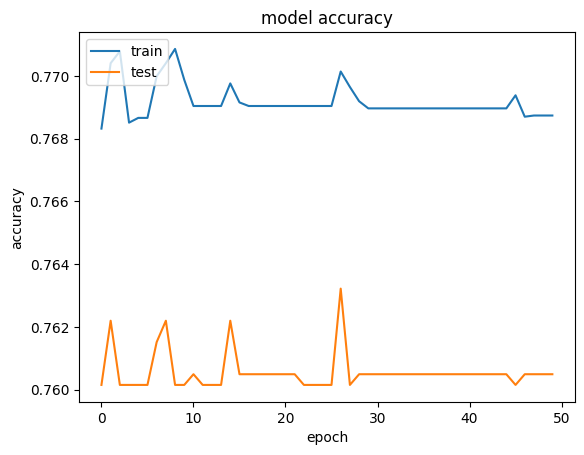

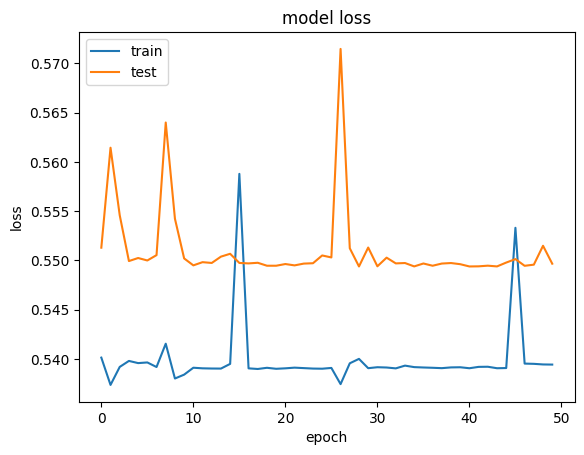

In [26]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# The model accuracy and loss graphs are very similar when comparing training and test test but are just shifted
# up or down. THis shows that our model is able to learn and predict